In [12]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
from valda.valuation import DataValuation

train_size = 1000
train_start = 0
train_size_batch = 200
dev_size = 200
test_size = 300
np.random.seed(0)
torch.manual_seed(0)

# Load data
X_train, y_train_clean, X_dev, y_dev, X_test, y_test = load_data(train_size, dev_size, test_size)
y_train, flip_indices = flip_labels(y_train_clean, flip_fraction=0.3)

# Create a batch of training data
X_train_batch = X_train[train_start:train_start+train_size_batch]
y_train_batch = y_train[train_start:train_start+train_size_batch]

# Define a DataValuation instance
dv = DataValuation(X_train_batch, y_train_batch, X_dev, y_dev)

Run with the default setting:
1. Logistic regression as the classifier
2. Prediction accuracy as the value measurement

In [13]:
start_time = time.time()
vals_loo = dv.estimate(method="loo")
end_time = time.time()
time_loo = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_loo))

100%|██████████| 200/200 [00:10<00:00, 18.66it/s]

Time elapsed: 10.72 seconds


In [14]:
start_time = time.time()
vals_tmc = dv.estimate(method="tmc-shapley")
end_time = time.time()
time_tmc = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_tmc))

100%|██████████| 500/500 [04:31<00:00,  1.84it/s]

Time elapsed: 271.27 seconds


In [15]:
start_time = time.time()
vals_beta = dv.estimate(method="beta-shapley")
end_time = time.time()
time_beta = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_beta))

100%|██████████| 50/50 [40:20<00:00, 48.40s/it]

Time elapsed: 2420.12 seconds


In [16]:
start_time = time.time()
vals_cs = dv.estimate(method="cs-shapley")
end_time = time.time()
time_cs = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_cs))

The number of training data with label 0 is 22
Labels on the other side: [1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:50<00:00,  4.54it/s]


score = 0.04
The number of training data with label 1 is 25
Labels on the other side: [0, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:48<00:00,  4.63it/s]


score = 0.095
The number of training data with label 2 is 22
Labels on the other side: [0, 1, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:56<00:00,  4.28it/s]


score = 0.045
The number of training data with label 3 is 17
Labels on the other side: [0, 1, 2, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:32<00:00,  5.38it/s]


score = 0.03
The number of training data with label 4 is 19
Labels on the other side: [0, 1, 2, 3, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:38<00:00,  5.10it/s]


score = 0.1
The number of training data with label 5 is 17
Labels on the other side: [0, 1, 2, 3, 4, 6, 7, 8, 9]


100%|██████████| 500/500 [01:27<00:00,  5.75it/s]


score = 0.025
The number of training data with label 6 is 24
Labels on the other side: [0, 1, 2, 3, 4, 5, 7, 8, 9]


100%|██████████| 500/500 [01:52<00:00,  4.43it/s]


score = 0.05
The number of training data with label 7 is 18
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 8, 9]


100%|██████████| 500/500 [01:42<00:00,  4.90it/s]


score = 0.045
The number of training data with label 8 is 16
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 7, 9]


100%|██████████| 500/500 [01:31<00:00,  5.45it/s]


score = 0.035
The number of training data with label 9 is 20
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 7, 8]


100%|██████████| 500/500 [01:45<00:00,  4.72it/s]

score = 0.035
Time elapsed: 1025.82 seconds


Save vals and time

In [17]:
np.save('data/vals_time/vals_loo.npy', vals_loo)
np.save('data/vals_time/vals_tmc.npy', vals_tmc)
np.save('data/vals_time/vals_beta.npy', vals_beta)
np.save('data/vals_time/vals_cs.npy', vals_cs)
np.save('data/vals_time/time_loo.npy', time_loo)
np.save('data/vals_time/time_tmc.npy', time_tmc)
np.save('data/vals_time/time_beta.npy', time_beta)
np.save('data/vals_time/time_cs.npy', time_cs)

Load vals and time

In [18]:
vals_loo = np.load('data/vals_time/vals_loo.npy', allow_pickle=True)
vals_tmc = np.load('data/vals_time/vals_tmc.npy', allow_pickle=True)
vals_beta = np.load('data/vals_time/vals_beta.npy', allow_pickle=True)
vals_cs = np.load('data/vals_time/vals_cs.npy', allow_pickle=True)
time_loo = np.load('data/vals_time/time_loo.npy', allow_pickle=True)
time_tmc = np.load('data/vals_time/time_tmc.npy', allow_pickle=True)
time_beta = np.load('data/vals_time/time_beta.npy', allow_pickle=True)
time_cs = np.load('data/vals_time/time_cs.npy', allow_pickle=True)

# To dictionary
vals_loo = vals_loo.item()
vals_tmc = vals_tmc.item()
vals_beta = vals_beta.item()
vals_cs = vals_cs.item()

Create vals_rand dictionary

In [19]:
vals_rand = {}
for i in range(train_size_batch):
    vals_rand[i] = np.random.rand()
time_rand = 0

Plot the results

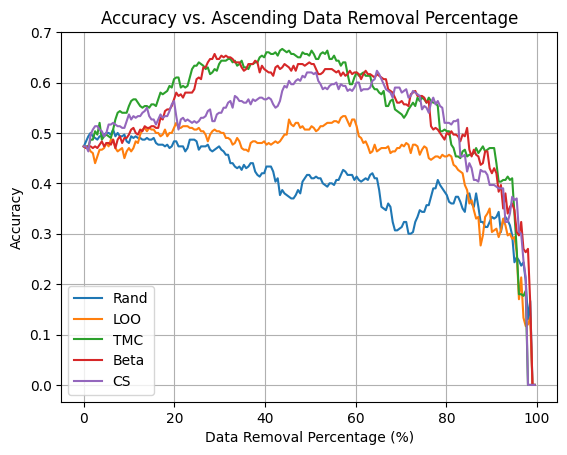

The weighted accuracy drop for Rand is 0.037
The weighted accuracy drop for LOO is 0.018
The weighted accuracy drop for TMC is -0.309
The weighted accuracy drop for Beta is -0.207
The weighted accuracy drop for CS is -0.211


In [20]:
acc_rand_asc, acc_loo_asc, acc_tmc_asc, acc_beta_asc, acc_cs_asc, _ = shap_comparison(
    X_train_batch, y_train_batch, X_test, y_test,
    remove_high_value=False,
    vals_rand=vals_rand,
    vals_loo=vals_loo,
    vals_tmc=vals_tmc,
    vals_beta=vals_beta,
    vals_cs=vals_cs)

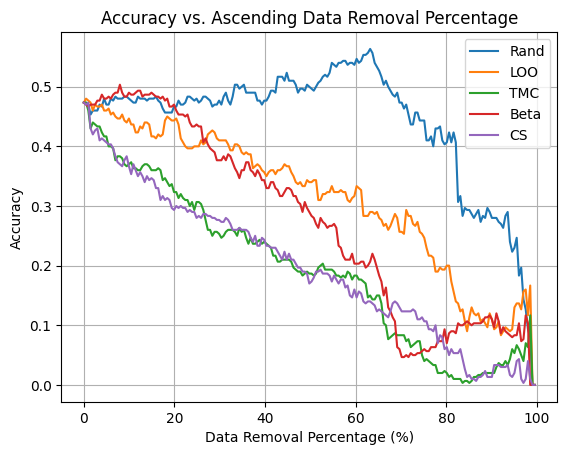

The weighted accuracy drop for Rand is 0.038
The weighted accuracy drop for LOO is 0.289
The weighted accuracy drop for TMC is 0.662
The weighted accuracy drop for Beta is 0.302
The weighted accuracy drop for CS is 0.680


In [21]:
acc_rand_des, acc_loo_des, acc_tmc_des, acc_beta_des, acc_cs_des, _ = shap_comparison(
    X_train_batch, y_train_batch, X_test, y_test,
    remove_high_value=True,
    vals_rand=vals_rand,
    vals_loo=vals_loo,
    vals_tmc=vals_tmc,
    vals_beta=vals_beta,
    vals_cs=vals_cs)

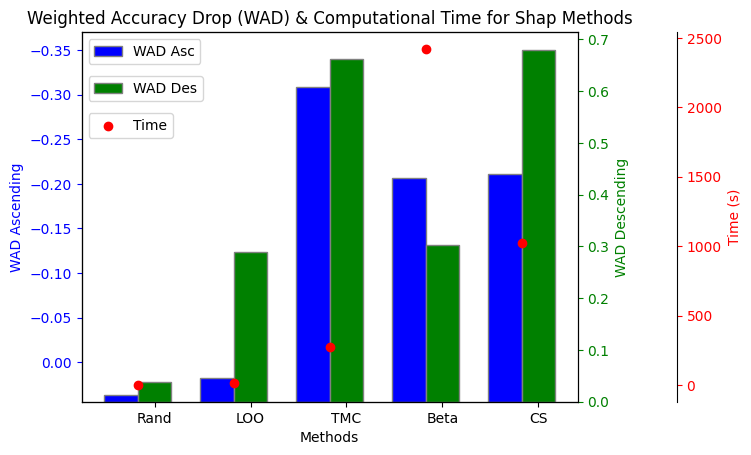

In [22]:
methods = ['Rand', 'LOO', 'TMC', 'Beta', 'CS']
acc_values_asc = [acc_rand_asc, acc_loo_asc, acc_tmc_asc, acc_beta_asc, acc_cs_asc]
acc_values_des = [acc_rand_des, acc_loo_des, acc_tmc_des, acc_beta_des, acc_cs_des]
time_values = [time_rand, time_loo, time_tmc, time_beta, time_cs]

barWidth = 0.35
r1 = np.arange(len(acc_values_asc))
r2 = [x + barWidth for x in r1]
r_time = [x + barWidth/2 for x in r1]

fig, ax1 = plt.subplots()

ax1.set_ylim([max(acc_values_asc) * 1.2, min(acc_values_asc) * 1.2])
height = acc_values_asc - max(acc_values_asc) * 1.2
bottom = max(acc_values_asc) * 1.2
bars1 = ax1.bar(r1, height=height, bottom=bottom, color='b', width=barWidth, edgecolor='grey', label='WAD Asc')
ax1.set_xlabel('Methods')
ax1.set_xticks([r + barWidth for r in range(len(acc_values_asc))])
ax1.set_xticklabels(methods)
ax1.set_ylabel('WAD Ascending', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
bars2 = ax2.bar(r2, acc_values_des, color='g', width=barWidth, edgecolor='grey', label='WAD Des')
ax2.set_ylabel('WAD Descending', color='g')
ax2.tick_params('y', colors='g')

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.2))
ax3.scatter(r_time, time_values, color='r', marker='o', label='Time')
ax3.set_ylabel('Time (s)', color='r')
ax3.tick_params('y', colors='r')

ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
ax3.legend(loc='upper left', bbox_to_anchor=(0, 0.8))

plt.title('Weighted Accuracy Drop (WAD) & Computational Time for Shap Methods')
plt.show()